In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
sns.set(style="whitegrid")

In [16]:
from scripts.generate_datasets import generate_gaussian_mixture, generate_banana_posterior
from scripts.kernels import imq_kernel, linear_kernel, compute_kernel_matrix

In [17]:
def compute_ess(kernel_matrix):
    """Computes the Effective Sample Size (ESS)."""
    n = kernel_matrix.shape[0]
    mean_kernel = np.mean(kernel_matrix)
    trace = np.trace(kernel_matrix)
    ess = (n * mean_kernel**2) / (np.sum(kernel_matrix**2) / n)
    return ess


In [18]:
def run_experiment(data_fn, kernel_fn, kernel_name='Kernel', kernel_kwargs={}, n_samples=500):
    """Runs kernel analysis on a dataset and returns ESS/sec and plot."""
    print(f"\nRunning experiment with {kernel_name} on {data_fn.__name__} data")

    # Generate data
    data = data_fn(n_samples)

    # Time kernel computation
    start_time = time.time()
    K = compute_kernel_matrix(data, kernel_fn, **kernel_kwargs)
    ess = compute_ess(K)
    elapsed_time = time.time() - start_time
    ess_per_sec = ess / elapsed_time

    # Log metrics
    print(f"ESS: {ess:.2f}")
    print(f"Time taken: {elapsed_time:.4f}s")
    print(f"ESS/sec: {ess_per_sec:.2f}")

    # Plot
    plot_title = f"{kernel_name} on {data_fn.__name__}"
    plot_data(data, title=plot_title)

    return {
        'ess': ess,
        'time': elapsed_time,
        'ess_per_sec': ess_per_sec,
        'kernel': kernel_name,
        'dataset': data_fn.__name__
    }

In [19]:
def plot_data(data, title=""):
    """2D scatter plot of the data."""
    plt.figure(figsize=(6, 5))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.5, s=20)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.tight_layout()
    plt.show()


In [20]:
def run_all_experiments():
    results = []

    datasets = [generate_gaussian_mixture, generate_banana_posterior]
    kernels = [
        (imq_kernel, 'IMQ Kernel', {'alpha': 0.5, 'c': 1.0}),
        (linear_kernel, 'Linear Kernel', {})
    ]

    for data_fn in datasets:
        for kernel_fn, kernel_name, kwargs in kernels:
            result = run_experiment(data_fn, kernel_fn, kernel_name, kwargs)
            results.append(result)

    return results


Running experiment with IMQ Kernel on generate_gaussian_mixture data
ESS: 0.71
Time taken: 3.0873s
ESS/sec: 0.23


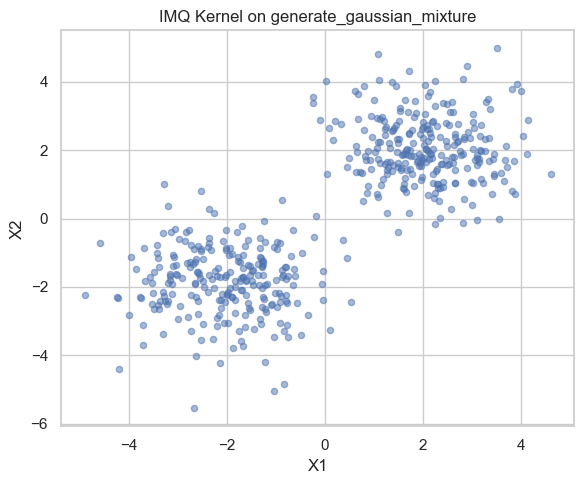


Running experiment with Linear Kernel on generate_gaussian_mixture data
ESS: 0.00
Time taken: 0.5342s
ESS/sec: 0.00


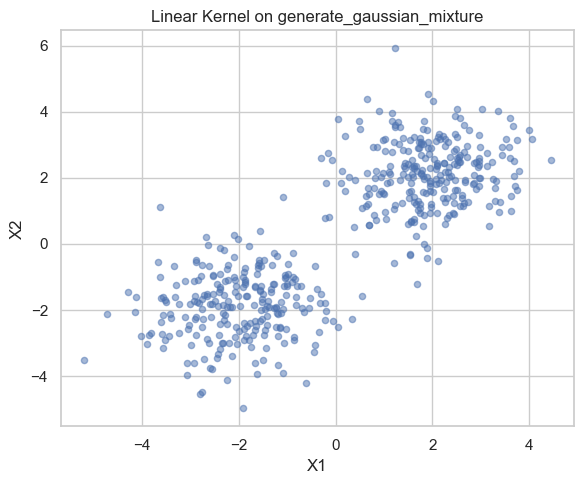


Running experiment with IMQ Kernel on generate_banana_posterior data
ESS: 0.89
Time taken: 2.1716s
ESS/sec: 0.41


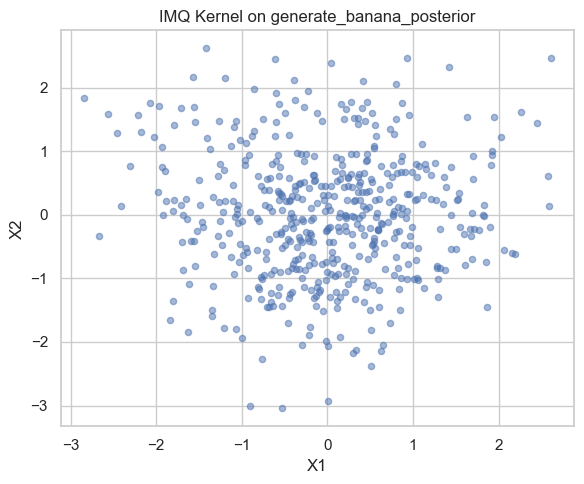


Running experiment with Linear Kernel on generate_banana_posterior data
ESS: 0.00
Time taken: 0.6569s
ESS/sec: 0.00


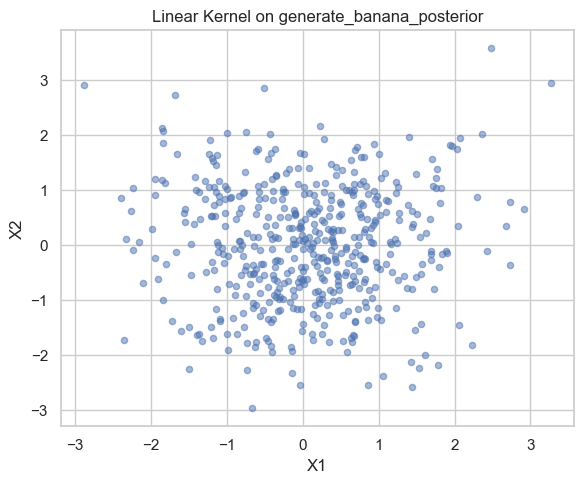


Summary:
IMQ Kernel on generate_gaussian_mixture: ESS/sec = 0.23
Linear Kernel on generate_gaussian_mixture: ESS/sec = 0.00
IMQ Kernel on generate_banana_posterior: ESS/sec = 0.41
Linear Kernel on generate_banana_posterior: ESS/sec = 0.00


In [21]:
if __name__ == "__main__":
    results_summary = run_all_experiments()
    print("\nSummary:")
    for res in results_summary:
        print(f"{res['kernel']} on {res['dataset']}: ESS/sec = {res['ess_per_sec']:.2f}")